# Grafische Darstellung

Grundsätzlich ist die grafische Darstellung eines Zusammenhangs ein zweidimensionales Bild, welches entsprechend dessen Inhaltes Pixel am Bildschirm aktiviert.

## Plotten mit Matplotlib

[Matplotlib](http://www.matplotlib.org) ist eine Python Bibliothek für grafische Darstellungen.
Es generiert "figures", welche entweder direkt Elemente darstellen, oder aus ein oder mehreren "axis" Koordinatensystemen bestehen.
In den üblichen Anwendungen wird eine leere "figure" mit einem Koordinatensystem "axis" erstellt,
auf welche dann Punkte und Linien für den Plot gezeichnet werden.
Für einfache Bedienung ist die [PyPlot API](http://matplotlib.org/api/pyplot_api.html) besonders praktisch.

Anschließend wird diese Grafik entweder zu einem Rasterbild (häufig ein PNG) oder einer Vektorgrafik (SVG oder PDF) gerendert.

Link: [technischer Hintergrund von Matplotlib](http://aosabook.org/en/matplotlib.html)

### Setup

1. `%matplotlib inline` ist für das IPython Notebook notwendig und aktiviert die eingebetteten Grafiken.
1. Mittels `import matplotlib.pyplot as plt` wird die `pyplot` matplotlib API in `plt` geladen.
1. Häufig wird [NumPy](3-2-numerik.ipynb) mittels `import numpy as np` importiert, um vektorwertige Funktionen zur Verfügung zu haben.

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# `rcParams` ist eine Map zur Konfiguration Matplotlibs.
# Hier wird die Standardgröße der Figur festgelegt:
from matplotlib import rcParams
rcParams["figure.figsize"] = (10,5)

### Line Plot

Einfache Darstellung des x-y Zusammenhangs.

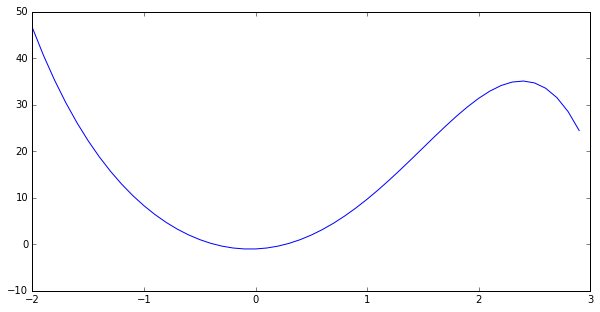

In [13]:
# xx und yy werden die x und y koordinaten aller Punkte beinhalten.

xx = []
yy = []

for i in range(-20, 30):
    x = i / 10.
    y = -.3 * x** 5 + 10 * x**2 + x - 1
    xx.append(x)
    yy.append(y)

plt.plot(xx, yy)

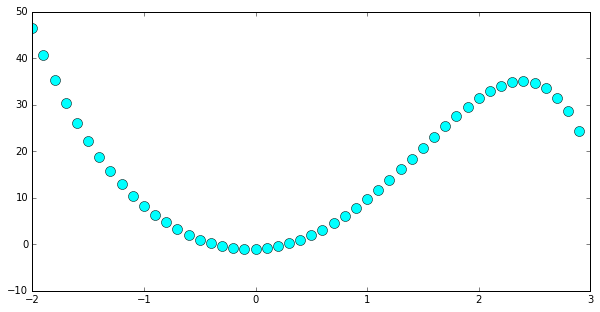

In [14]:
# selbe daten, andere Darstellung
plt.plot(xx, yy, marker="o", color="cyan", ms=10, linestyle="")

## Scatterplot

Dies ist ähnlich zu `plt.plot`, sind aber designed für die Darstellung von (x, y) Punkten.
Diese können auch mit diversen spezifischen Eigenschaften wie Farbe, Form und Transparenz versehen werden.
Hierfür können den Parametern `s`, `c` (`color`), usw. Vektoren (mit der Länge der Anzahl Punkte) übergeben werden.

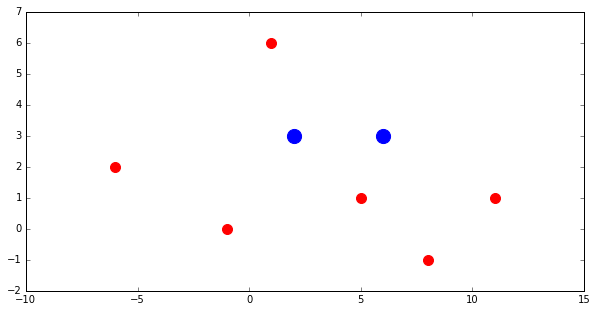

In [15]:
xx = [5, -6, 1, 8, -1, 11]
yy = [1, 2, 6, -1, 0, 1]

plt.scatter(xx, yy, s=100, color="red")
plt.scatter([2, 6], [3, 3], s=200, color="blue")

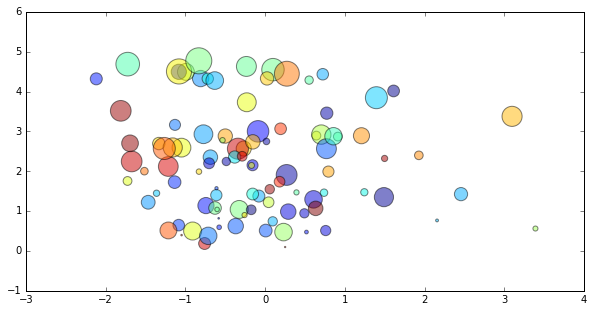

In [16]:
N = 100
x = np.random.randn(N)
y = 5 * np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (10 * np.random.rand(N) + y)**2

plt.scatter(x, y, s=area, c=colors, alpha=0.5)

### Vektorfelder als Streamplot

Dies visualisiert beispielsweise das Verhalten einer Differentialgleichung.
Hier im konkreten Fall wird ein zweidimensionaler Vektor so definiert:

\begin{equation}
\begin{pmatrix}
u \\
v
\end{pmatrix}
:=
\begin{pmatrix}
-2 -x + 2*y^2 \\
1 + \sqrt{x^2 + y^2}
\end{pmatrix}
\end{equation}

wobei $x \in \{-6,\dots 6\}$ und $y \in \{-3,\dots 3\}$ liegt.

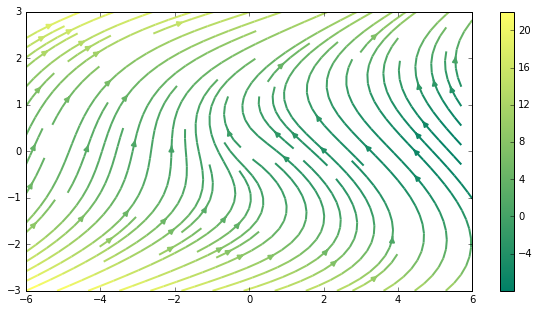

In [17]:
X = np.linspace(-6, 6, 100) # 100 ist die Anzahl der gleichmäßig verteilten Punkte
Y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(X, Y)

U = -2 - X + 2 * Y**2
V = 1 + np.sqrt(X**2 + Y**2)

plt.streamplot(X, Y, U, V, color=U, linewidth=2, cmap=plt.cm.summer)
plt.colorbar()

Selber Plot nocheinmal, wobei zusätzlich die Dicke der Linien variiert.
In diesem Fall, proportional zum Absolutbetrag des Vektors, also der Länge:
$\text{speed} = \|U^2 + V^2\|_2$

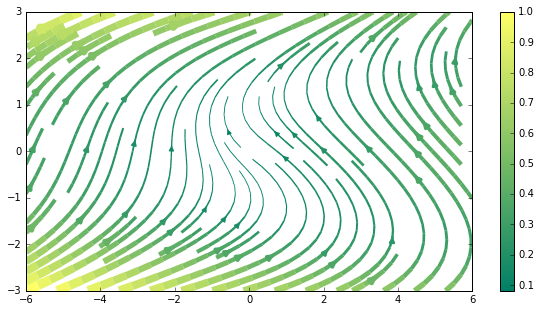

In [18]:
speed = np.sqrt(U**2 + V**2)
speed /= speed.max()

plt.streamplot(X, Y, U, V, color=speed, linewidth=10*speed, cmap=plt.cm.summer)
plt.colorbar()

## Anmerkungen

Manchmal ist es nützlich, [Plots mit Anmerkungen](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate) zu versehen.

Das hier gezeigte Beispiel arbeitet mit dem Koordinatensystem der Daten
(deshalb die Verwendung des `ax`-Achsen Objekts und die Angabe `'data'`),
die Box hat einen runden Rahmen (`bbox`) und einen grauen Hintergrund (`fc`),
und der Pfeil selbst beginnt horizontal (`angleA=0`) und endet vertikal (`angleB=270`) mit einem kleinen Radius im Knick.

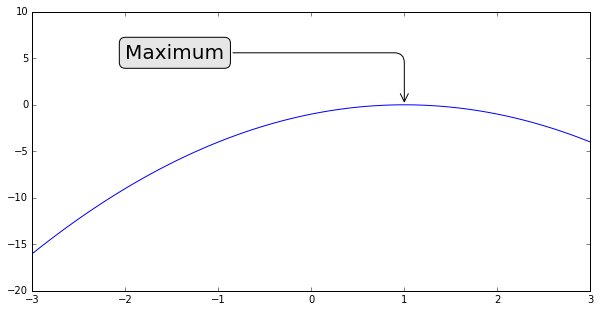

In [19]:
import matplotlib.pyplot as plt
import numpy as np

xx = np.linspace(-3, 3, 100)
yy = -xx**2 + 2*xx - 1

plt.plot(xx, yy)
plt.ylim(-20, 10)
ax = plt.gca()
ax.annotate('Maximum',
            xy=(1, 0), xycoords='data',
            xytext=(-2, 5), textcoords='data', size = 20,
            bbox = {'boxstyle' : 'round', 'fc' : '0.9'},
            arrowprops = {'arrowstyle' : '->', 'connectionstyle' : 'angle,angleA=0,angleB=270,rad=10'})

## Komplexe Funktionen

Eine Funktion, die von $\mathbb{C} \rightarrow \mathbb{C}$ abbildet,
ist schwierig darzustellen.
Das liegt daran, dass $\mathbb{C} \equiv \mathbb{R}^2$ ist und daher eigentlich zwei reele Zahlen auf zwei andere reele Zahlen abgebildet werden.

Ein Ansatz wäre, den Real- und Imaginärteil separat zu plotten.
Jedoch verliert das nicht nur jeglichen Reiz oder tiefere Einsicht,
sondern funktioniert auch nicht richtig um die Abhängigkeit der Funktion in Bezug auf Real- und Imaginärteil des Arguments zu sehen.

Eine weitere Art ist, mittels Farbe und Farbsättigung das Ergebnis der Funktion für jeden Punkt der Auswertung darzustellen.
Dabei gibt der Betrag der Zahl die Sättigung an, wobei ein hoher Wert gegen Weiß geht und dunkel und schwarz für niedrige Werte und die Null steht.
Das Argument gibt nach dessen Winkel die Farbe im Farbkreis an -- rot ist dabei 0° und eine positive reele Zahl.

Im folgenden nun drei Beispiele: zuerst die Identität und dann zwei Funktionen mit leicht zu sehenden Nullstellen.

Es wird mpmath's [cplot](http://mpmath.googlecode.com/svn/trunk/doc/build/plotting.html#complex-function-plots) verwendet.

In [22]:
# Nur für das Skriptum wird auf quadatische PNG Plots umgestellt, später wieder SVG
%config InlineBackend.figure_formats=['png']
rcParams["figure.figsize"] = (10,10)
from mpmath import fp

Die Identität, rot ist positiv, reel; türkis ist negativ, reel, und dünklere Farben stehen für betragsmäßig kleinere Werte.

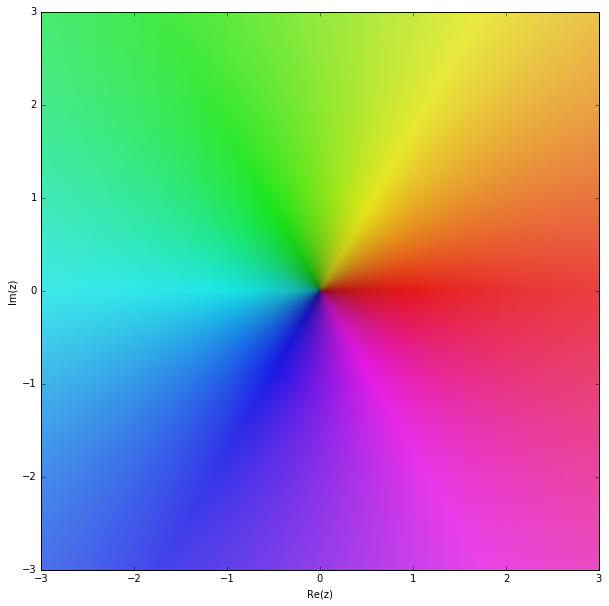

In [23]:
fp.cplot(lambda z : z, (-3, 3), (-3, 3), points=50000)

$$z \rightarrow \sin\left(\Re(z)^2 + \Im(z)^2\right) + \Im(z)\mathbb{i} $$

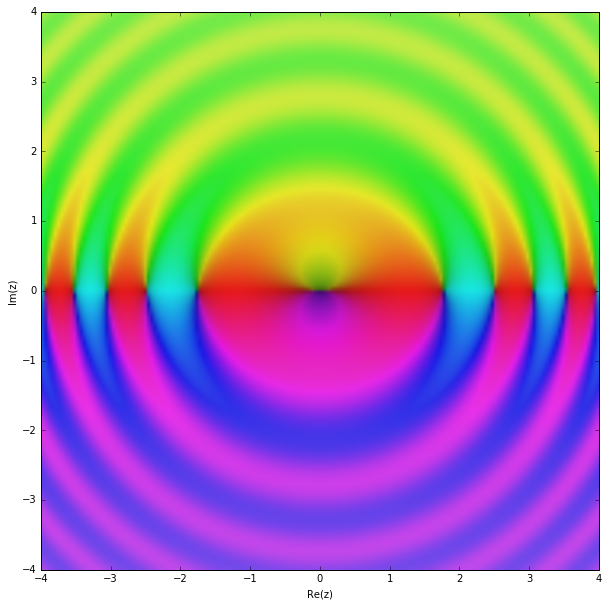

In [24]:
fp.cplot(lambda z: fp.sin(z.real**2 + z.imag**2) + z.imag*1j, (-4, 4), (-4, 4), points=30000)

Der Cosinus im komplexen: entlang der horizontalen Mittelachse, wo der Imaginärteil 0 ist,
sieht man den rot/türkisen Wechsel von positivem und negativen Werten wie er aus den üblichen reelen Plots bekannt ist.

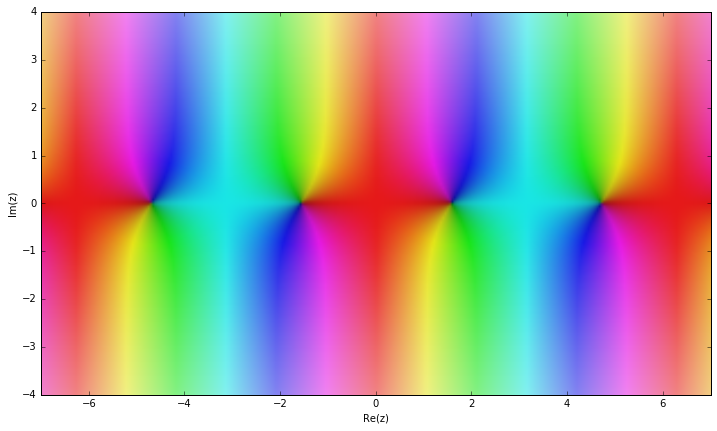

In [25]:
rcParams["figure.figsize"] = (12,10)
fp.cplot(fp.cos, (-7, 7), (-4, 4), points=50000)

In [26]:
%config InlineBackend.figure_formats=['svg']
rcParams["figure.figsize"] = (10,5)

## Balkendiagramme

Pyplot's `bar` und `barh` stellt Balkendiagramme vertikal, bzw. horizontal dar.
Es können die Balken aufeinander gestellt, Fehlerabschätzungen hinzugefügt, und natürlich die Farben geändert werden.
Siehe [Dokumentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar)

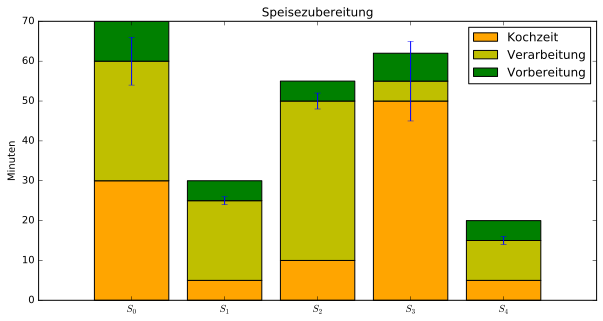

In [27]:
import matplotlib.pyplot as plt

kochzeit = np.array([30, 5, 10, 50, 5])
verarbeitung = np.array([30,20,40, 5, 10])
vorbereitung = np.array([10, 5, 5, 7, 5])
idx = np.arange(len(kochzeit))
speisen = ["$S_{%d}$"%i for i in idx]

p1 = plt.bar(idx, kochzeit, align="center", color='orange', 
             label='Kochzeit')
p2 = plt.bar(idx, verarbeitung, align="center", color='y', 
             bottom=kochzeit, 
             yerr=.2 * kochzeit, 
             label='Verarbeitung')
p3 = plt.bar(idx, vorbereitung, align="center", color='g', 
             bottom=kochzeit+verarbeitung, 
             label='Vorbereitung')

plt.title('Speisezubereitung')
plt.xticks(idx, speisen)
plt.ylabel("Minuten")
plt.legend()
plt.legend()

## Histogramme

### Histogram 2D

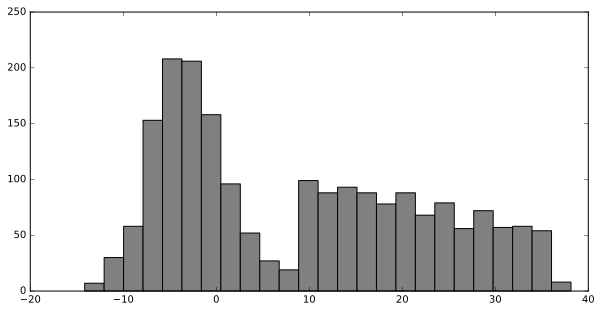

In [28]:
import numpy as np
data1 = np.r_[4 * np.random.randn(1000) - 3,
              np.linspace(3, 6, 1000)**2 + np.random.randn(1000)]
_ = plt.hist(data1, 25, color="grey")

### Histogram 3D

In [29]:
data2 = np.sin(np.linspace(0, 7, 2000)) * (.1 + .5 * np.random.rand(2000))

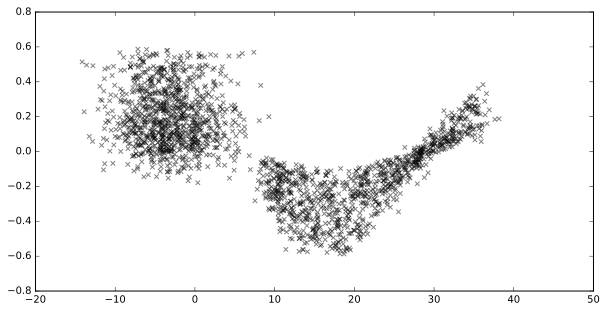

In [30]:
plt.scatter(data1, data2, c="black", marker="x", alpha=.5)

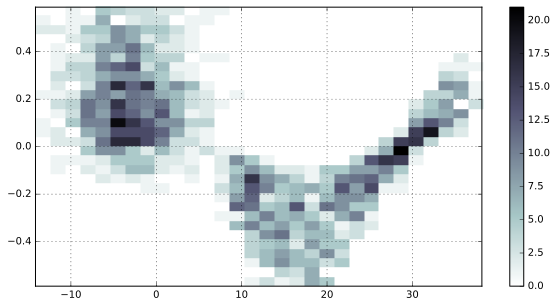

In [31]:
plt.hist2d(data1, data2, bins=30, cmap=plt.cm.bone_r)
plt.grid()
plt.colorbar()

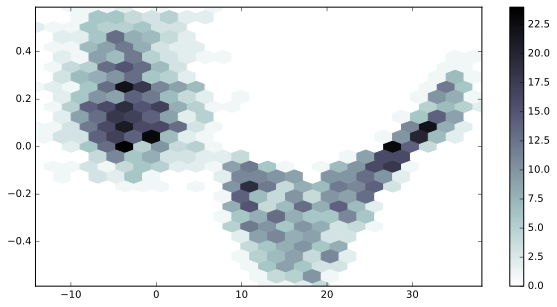

In [32]:
plt.hexbin(data1, data2, gridsize=25, cmap=plt.cm.bone_r)
plt.colorbar()

## Subplots

Matplotlib erlaubt auch, mehr als nur eine grafische Darstellung in dasselbe Bild einzufügen.
Die generelle Struktur ist, dass das ganze Bild eine "figure" ist,
und darauf Elemente wie Punkte und Lininen gezeichnet werden.
Für eine Darstellung einer Grafik mit einem Koordinatensystem gibt es "axis".
Es können nun als "subplot" mehrere axis-Koordinatensysteme in dieselbe "figure" eingebaut werden.

Hier wird mit `plt.subplots(2, 2)` eine 2x2 Matrix von axes objects erzeugt, welche dann in der variablen `axis` abgelegt wird. Wie man sehen kann, sind die axis-plots ziemlich leer, wobei der an der Position `[1, 0]` einen gelben `Circle` bekommt und der an Position `[1, 1]` einen Raster:

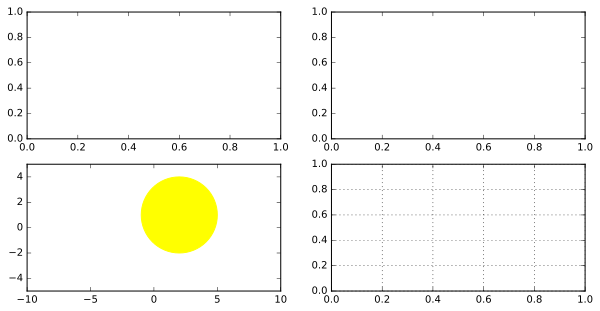

In [33]:
fig, axes = plt.subplots(2, 2)
ax = axes[1, 0]
ax.add_artist(plt.Circle((2, 1), 3, color="yellow"))
ax.set_xlim(-10, 10)
ax.set_ylim(-5, 5)
axes[1,1].grid()

Mit Einstellungen wie `sharey` können diese Subplots die Skalierung der Koordinatenachsen untereinander synchronisieren:

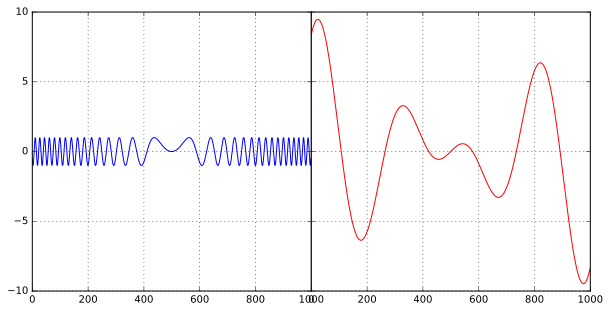

In [34]:
fig, axes = plt.subplots(1, 2, sharey=True)
xx = np.linspace(-10, 10, 1000)
[ax.grid() for ax in axes] # grid für beide
axes[0].plot(np.sin(xx * xx))
axes[1].plot(np.cos(xx) * xx, color="red")
fig.subplots_adjust(wspace=0) # no horizontal space

... und natürlich lassen sich unterschiedliche Plottypen kombinieren:

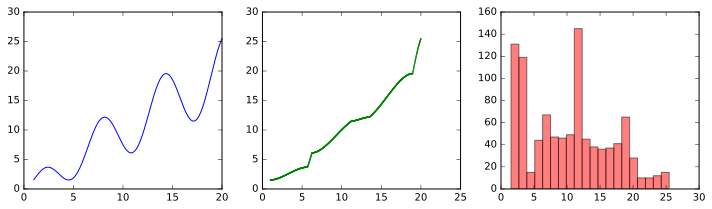

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,3))
xx = np.linspace(1, 20, 1000)
yy = np.log(xx**2 + 1) * np.sin(xx) + xx
ax1.plot(xx, yy)
ax2.scatter(sorted(xx), sorted(yy), s=1, marker=".", color="green")
ax3.hist(yy, bins=20, color="red", alpha=.5)
fig.tight_layout()

## Polardarstellung

Für periodische Funktionen eignet sich manchmal eine Polardarstellung. Hier werden die einzelnen Punkte nicht als x- und y-Koordinaten, sondern als Winkel (in radiant) und Radius interpretiert. Hier ein Beispiel:

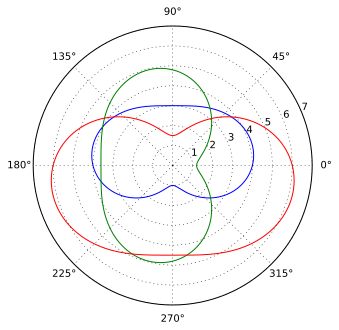

In [36]:
xx = np.linspace(0, 4 * np.pi, 1000)
yy = np.sin(xx) + np.cos(2 * xx) + 3
plt.close("all")
axpolar = plt.gca(projection='polar')
axpolar.plot(xx, yy)
axpolar.plot(xx + .5 * np.pi, 1.2 * yy, color="green")
axpolar.plot(xx +  1 * np.pi, 1.5 * yy, color="red")
axpolar.set_rmax(7)

## 3d Plots

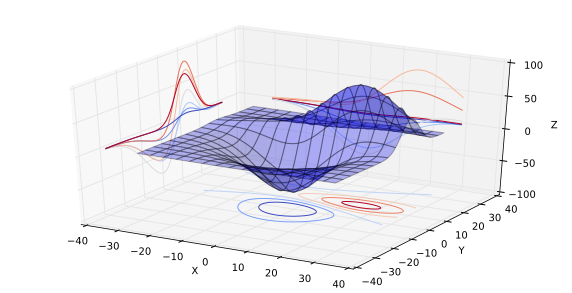

In [37]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contour(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)

plt.show()

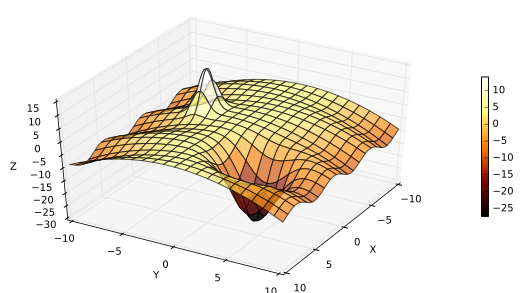

In [38]:
from matplotlib import cm
from IPython.html.widgets import interact

sr = (-10, 10, .1)
@interact(a = sr, b = sr, c = sr, d = sr, elevation=(0,90), azimuth=(0,180))
def xy_grid3d(a = -2, b = -4, c = 4, d = 4, elevation=40, azimuth=30):
    X = np.linspace(-10, 10, 100)
    Y = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(X, Y)
    
    Z = 15 * np.exp(-.5 * (X - a)**2 - (Y - b)**2) 
    Z += - 25 * np.exp(.15 * (-(X - c)**2 - (Y - d)**2))
    Z += - .1 * (np.sin(X) - Y)**2

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.view_init(elev=elevation, azim=azimuth)
    ax.plot_surface(X, Y, Z, rstride=5, cstride=5, alpha=0.65, cmap=cm.afmhot)
    
    #cset = ax.contour(X, Y, Z, zdir='z', offset=-30, cmap=cm.coolwarm)
    #cset = ax.contour(X, Y, Z, zdir='x', offset=-15, cmap=cm.coolwarm)
    #cset = ax.contour(X, Y, Z, zdir='y', offset=-15, cmap=cm.coolwarm)
    
    ax.set_xlabel('X')
    ax.set_xlim(-10, 10)
    ax.set_ylabel('Y')
    ax.set_ylim(-10, 10)
    ax.set_zlabel('Z')
    ax.set_zlim(-30, 15)
    
    # Colorbar auf der rechten Seite
    m = plt.cm.ScalarMappable(cmap=cm.afmhot)
    m.set_array(Z)
    plt.colorbar(m, shrink=.5)
    
    plt.show()

## Plotten mit Sympy

In [39]:
%matplotlib inline
from sympy.plotting import plot, plot_implicit
from sympy.abc import x, y
from sympy import sin, cos, exp, log, sqrt, And, Or

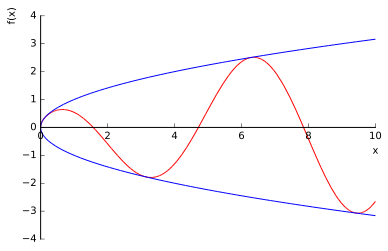

In [40]:
p = plot(sqrt(x) * cos(x), sqrt(x), -sqrt(x), (x, 0, 10), show=False)
p[0].line_color="red"
p[1].line_color="blue"
p[2].line_color="blue"
p.show()

In [41]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (8,6)

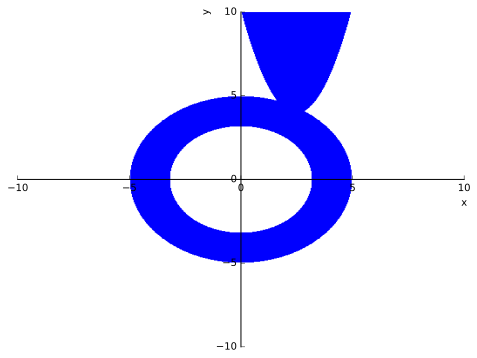

In [42]:
p = plot_implicit(Or(
                 And(
                    x**2 + y**2 < 25, 
                    x**2 + y**2 > 10, 
                 ), 
                 x**2 - 5*x < y - 10), 
              (x,-10, 10), (y, -10, 10))

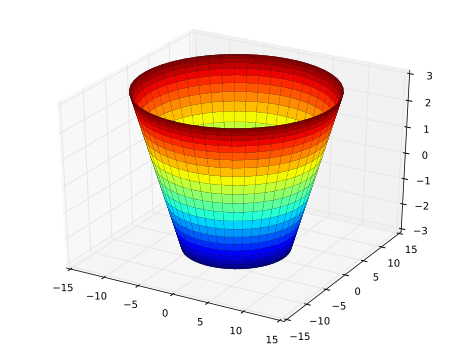

In [43]:
from sympy.plotting import plot3d_parametric_surface
from sympy import pi
from sympy.abc import u, v
R = 10
r = 3
p = plot3d_parametric_surface(
    (R + r * cos(u)) * cos(v),
    (R + r * cos(u)) * sin(v), 
    r * cos(u),
    (u, -pi, pi), (v, -pi, pi))

In [ ]:
# credits: http://stackoverflow.com/questions/4680525/plotting-implicit-equations-in-3d

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

def plot_implicit(fn, bbox=(-2.5,2.5)):
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==0)
    bbox ..the x,y,and z limits of plotted interval'''
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    A = np.linspace(xmin, xmax, 100) # resolution of the contour
    B = np.linspace(xmin, xmax, 35) # number of slices
    A1, A2 = np.meshgrid(A,A) # grid on which the contour is plotted

    for z in B: # plot contours in the XY plane
        X,Y = A1,A2
        Z = fn(X,Y,z)
        cset = ax.contour(X, Y, Z+z, [z], zdir='z')
        # [z] defines the only level to plot for this contour for this value of z

    for y in B: # plot contours in the XZ plane
        X,Z = A1,A2
        Y = fn(X,y,Z)
        cset = ax.contour(X, Y+y, Z, [y], zdir='y')

    for x in B: # plot contours in the YZ plane
        Y,Z = A1,A2
        X = fn(x,Y,Z)
        cset = ax.contour(X+x, Y, Z, [x], zdir='x')

    # must set plot limits because the contour will likely extend
    # way beyond the displayed level.  Otherwise matplotlib extends the plot limits
    # to encompass all values in the contour.
    ax.set_zlim3d(zmin,zmax)
    ax.set_xlim3d(xmin,xmax)
    ax.set_ylim3d(ymin,ymax)

    plt.show()

In [ ]:
def goursat_tangle(x,y,z):
    a,b,c = 0.0,-5.0,11.8
    return x**4+y**4+z**4+a*(x**2+y**2+z**2)**2+b*(x**2+y**2+z**2)+c

plot_implicit(goursat_tangle)

In [ ]:
def dodekaederstar(x, y, z):
    from math import sqrt
    golden_ratio = (1. + sqrt(5.)) / 2.
    xyz2 = x**2 + y**2 + z**2
    lhs = 15 * 27 * (2 * golden_ratio - 3) \
        * (x**2 - golden_ratio**2 * y**2) \
        * (y**2 - golden_ratio**2 * z**2) \
        * (z**2 - golden_ratio**2 * x**2)
    rhs = (1-xyz2)**3 - 15 * (xyz2)**3
    return lhs - rhs

plot_implicit(dodekaederstar, bbox=(-1, 1))